In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Load data
df = pd.read_csv('survey-results-public.csv')
# Set max visible columns
pd.set_option('display.max_columns', None)
# Show head
df.head()

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,CompanyType,YearsProgram,YearsCodedJob,YearsCodedJobPast,DeveloperType,WebDeveloperType,MobileDeveloperType,NonDeveloperType,CareerSatisfaction,JobSatisfaction,ExCoderReturn,ExCoderNotForMe,ExCoderBalance,ExCoder10Years,ExCoderBelonged,ExCoderSkills,ExCoderWillNotCode,ExCoderActive,PronounceGIF,ProblemSolving,BuildingThings,LearningNewTech,BoringDetails,JobSecurity,DiversityImportant,AnnoyingUI,FriendsDevelopers,RightWrongWay,UnderstandComputers,SeriousWork,InvestTimeTools,WorkPayCare,KinshipDevelopers,ChallengeMyself,CompetePeers,ChangeWorld,JobSeekingStatus,HoursPerWeek,LastNewJob,AssessJobIndustry,AssessJobRole,AssessJobExp,AssessJobDept,AssessJobTech,AssessJobProjects,AssessJobCompensation,AssessJobOffice,AssessJobCommute,AssessJobRemote,AssessJobLeaders,AssessJobProfDevel,AssessJobDiversity,AssessJobProduct,AssessJobFinances,ImportantBenefits,ClickyKeys,JobProfile,ResumePrompted,LearnedHiring,ImportantHiringAlgorithms,ImportantHiringTechExp,ImportantHiringCommunication,ImportantHiringOpenSource,ImportantHiringPMExp,ImportantHiringCompanies,ImportantHiringTitles,ImportantHiringEducation,ImportantHiringRep,ImportantHiringGettingThingsDone,Currency,Overpaid,TabsSpaces,EducationImportant,EducationTypes,SelfTaughtTypes,TimeAfterBootcamp,CousinEducation,WorkStart,HaveWorkedLanguage,WantWorkLanguage,HaveWorkedFramework,WantWorkFramework,HaveWorkedDatabase,WantWorkDatabase,HaveWorkedPlatform,WantWorkPlatform,IDE,AuditoryEnvironment,Methodology,VersionControl,CheckInCode,ShipIt,OtherPeoplesCode,ProjectManagement,EnjoyDebugging,InTheZone,DifficultCommunication,CollaborateRemote,MetricAssess,EquipmentSatisfiedMonitors,EquipmentSatisfiedCPU,EquipmentSatisfiedRAM,EquipmentSatisfiedStorage,EquipmentSatisfiedRW,InfluenceInternet,InfluenceWorkstation,InfluenceHardware,InfluenceServers,InfluenceTechStack,InfluenceDeptTech,InfluenceVizTools,InfluenceDatabase,InfluenceCloud,InfluenceConsultants,InfluenceRecruitment,InfluenceCommunication,StackOverflowDescribes,StackOverflowSatisfaction,StackOverflowDevices,StackOverflowFoundAnswer,StackOverflowCopiedCode,StackOverflowJobListing,StackOverflowCompanyPage,StackOverflowJobSearch,StackOverflowNewQuestion,StackOverflowAnswer,StackOverflowMetaChat,StackOverflowAdsRelevant,StackOverflowAdsDistracting,StackOverflowModeration,StackOverflowCommunity,StackOverflowHelpful,StackOverflowBetter,StackOverflowWhatDo,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,NaN,2 to 3 years,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"With a soft ""g,"" like ""jiff""",Strongly agree,Strongly agree,Agree,Disagree,Strongly agree,Agree,Agree,Disagree,Somewhat agree,Disagree,Strongly agree,Strongly agree,Strongly disagree,Agree,Agree,Disagree,Agree,"I'm not actively looking, but I am open to new...",0.0,Not applicable/ never,Very important,Very important,Important,Very important,Very important,Very important,Important,Very important,Very important,Very important,Very important,Very important,Somewhat important,Not very important,Somewhat important,Stock options; Vacation/days off; Remote options,Yes,Other,NaN,NaN,Important,Important,Important,Somewhat important,Important,Not very important,Not very important,Not at all important,Somewhat important,Very important,NaN,NaN,Tabs,NaN,Online course; Open source contributions,NaN,NaN,NaN,6:00 AM,Swift,Swift,NaN,NaN,NaN,NaN,iOS,iOS,Atom; Xcode,Turn on some music,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Somewhat satisfied,Not very satisfied,Not at all satisfied,Very satisfied,Satisfied,Not very satisfied,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I have created a CV or Developer Story on Stac...,9.0,Desktop; iOS app,At leas

In [1]:
def print_stats(df, column_name):
    """Prints total respondets, count of non NaN respondets and their percentage
    Parameters
    ----------
    df : pandas dataframe
        dataframe on which we are operating
    column_name : string
        name of column for which will stats will be printed
    """
    not_null = df[column_name].dropna()
    print("Total respondets: ",df.shape[0])
    print("Responded to Pronounce GIF questions: ",not_null.shape[0])
    print("Percent of respoded to question: ", (not_null.shape[0] * 100)/df.shape[0])


In [4]:
# Print stats of HighestEducationParents
print_stats(df, "HighestEducationParents")

Total respondets:  51392
Responded to Pronounce GIF questions:  34938
Percent of respoded to question:  67.98334371108344


In [6]:
# Print stats of Salary
print_stats(df, "Salary")

Total respondets:  51392
Responded to Pronounce GIF questions:  12891
Percent of respoded to question:  25.083670610211705


38277.773590645666
55.78920318284991


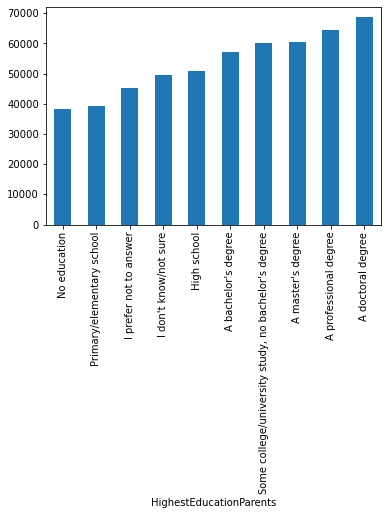

In [29]:
# Relationship between parents education and salary of respondent for our first question
# Grouping respondents by their parents education and counting mean value of salary for each group. Sorted ascending and removed NaN values
grouped_df = df.groupby(["HighestEducationParents"]).mean()['Salary'].sort_values().dropna()
grouped_df.plot(kind="bar")
print("Percetage salary of no education/doctoral degree"(grouped_df[0]*100)/grouped_df[-1])
# We can see that higher parent education means higher respondent's salary, If parent has a doctoral degree then respodent earns almost 2 times more than if parent has no education.

Total respondets:  51392
Responded to Pronounce GIF questions:  51008
Percent of respoded to question:  99.25280199252802


<AxesSubplot:>

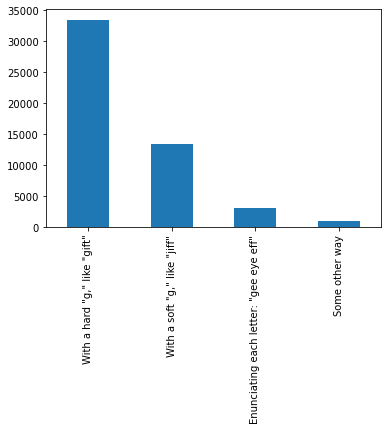

In [7]:
# Number of people pronouncing GIF and others for our second question
# print stats of PronounceGIF
print_stats(df, "PronounceGIF")
counts = pd.value_counts(df['PronounceGIF'])
counts.plot.bar()

<AxesSubplot:xlabel='SeriousWork'>

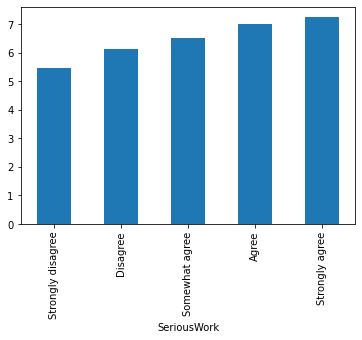

In [112]:
# Relationship betweenSeriousWork and JobSatisfaction of respondent for our third question
# Grouping respondents by SeriousWork and counting mean value of Job Satisfaction for each group. Sorted ascending and removed NaN values
new_df = df.groupby(["SeriousWork"]).mean()['JobSatisfaction'].sort_values().dropna()
new_df.plot(kind="bar")


<AxesSubplot:xlabel='SeriousWork'>

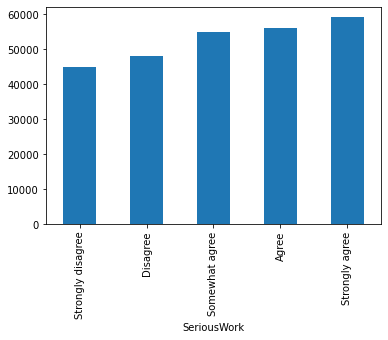

In [113]:
# Relationship between SeriousWork and salary of respondent for our third question
# Grouping respondents by Serious Work and counting mean value of salary for each group. Sorted ascending and removed NaN values
new_df = df.groupby(["SeriousWork"]).mean()['Salary'].sort_values().dropna()
new_df.plot(kind="bar")
